In [1]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

import kagglehub

In [2]:
# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Download latest version
path = kagglehub.dataset_download("lokeshparab/amazon-products-dataset")

print("Path to dataset files:", path)

100%|██████████| 79.7M/79.7M [00:01<00:00, 52.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lokeshparab/amazon-products-dataset/versions/2


In [4]:
df=pd.read_csv(path+"/Amazon-Products.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [5]:
df = df.sample(frac=0.7, random_state=1)

In [6]:
df.shape

(386110, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71706 entries, 440099 to 96001
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            71706 non-null  object
 1   main_category   71706 non-null  object
 2   sub_category    71706 non-null  object
 3   image           71706 non-null  object
 4   link            71706 non-null  object
 5   ratings         48875 non-null  object
 6   no_of_ratings   48875 non-null  object
 7   discount_price  63655 non-null  object
 8   actual_price    69327 non-null  object
dtypes: object(9)
memory usage: 5.5+ MB


In [ ]:
df['main_category'].value_counts()

,count
main_category,
accessories,15147
men's clothing,9931
women's clothing,9884
"tv, audio & cameras",9044
men's shoes,7420
appliances,4293
stores,4213
home & kitchen,1902
kids' fashion,1738


In [ ]:
df['name'].unique()
df['name'].duplicated().sum()

6821

In [7]:
duplicate_names = df[df['name'].duplicated(keep=False)]
duplicate_names.head(100)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
204340,PC Jeweller 18k (750) Rose Gold and Diamond Ri...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61ilW8FsVO...,https://www.amazon.in/PC-Jeweller-Rose-Diamond...,NaN,NaN,"₹18,588","₹21,868"
83768,Kandid Car Seat Neck Cushion Pillow for All Cars,car & motorbike,Car Parts,https://m.media-amazon.com/images/I/71upFhtskF...,https://www.amazon.in/Kandid-Seat-Neck-Cushion...,3.6,163,₹149,₹179
549515,ALSU Red Leather Women's & Girl's Wallet (1955),stores,Women's Fashion,https://m.media-amazon.com/images/I/61RMqWMn6w...,https://www.amazon.in/ALSU-Womens-Clutch-LDU-0...,3.9,192,₹347,"₹1,499"
428506,Pepe Jeans Men's Slim Fit Casual Shirt,men's clothing,Shirts,https://m.media-amazon.com/images/I/81dfGF5VGy...,https://www.amazon.in/Pepe-Jeans-Checkered-Cas...,3.5,63,"₹1,774","₹2,499"
450081,Birde Men Mesh Sports Shoes for Men Running an...,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Birde-Sports-Running-Sho...,2.9,29,₹299,₹499
...,...,...,...,...,...,...,...,...,...
535435,GOD BLESS Regular Fit Women's Top,women's clothing,Western Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/GOD-BLESS-Regular-Womens...,3.6,35,₹499,"₹1,299"
205019,PC Jeweller 18k (750) White Gold and Solitaire...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/61Rt4ov+p5...,https://www.amazon.in/PC-Jeweller-White-Solita...,NaN,NaN,"₹58,854","₹69,240"
253072,"Phresh Air Purifier and Dehumidifier for Car,K...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Phresh-Purifier-Dehumidi...,3.7,12,₹519,₹699
3202,HASTHIP® Electric Kettle for Car 0.4 Litre Por...,appliances,All Appliances,https://m.media-amazon.com/images/I/51HhovDzsK...,https://www.amazon.in/HASTHIP%C2%AE-Electric-K...,3.8,27,"₹1,799","₹3,359"


In [8]:
duplicate_names_sorted = duplicate_names.sort_values(by='name')
duplicate_names_sorted.head(50)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
10092,""" SF-400A"" ,10kg x 1gm kitchen weighing scale ...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SF-400A-weighing-Electro...,NaN,NaN,₹415,₹899
347148,""" SF-400A"" ,10kg x 1gm kitchen weighing scale ...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/31So5vgWk-...,https://www.amazon.in/SF-400A-weighing-Electro...,NaN,NaN,₹415,₹899
2342,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
341117,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/61HihavsUS...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
244112,"""A"" PLUS Hygiene Portable Room Air Purifier an...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/I/61HihavsUS...,https://www.amazon.in/Hygiene-Portable-Humidif...,4.1,911,"₹1,499","₹2,678"
135561,"""PH"" POSHAKHUB Women Georgette Hand Embroidery...",women's clothing,Ethnic Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PH-POSHAKHUB-Georgette-E...,4.1,26,₹989.10,"₹1,666"
117541,"""PH"" POSHAKHUB Women Georgette Hand Embroidery...",women's clothing,Clothing,https://m.media-amazon.com/images/I/61yFCDHRxg...,https://www.amazon.in/PH-POSHAKHUB-Georgette-E...,4.1,26,₹989.10,"₹1,666"
166691,"""TGC"" Wine Colour Velvet Metal Bangle / Chudi ...",accessories,Fashion & Silver Jewellery,https://m.media-amazon.com/images/I/71NNz8OgEf...,https://www.amazon.in/Colour-Velvet-Bangle-Ban...,3.5,13,₹159,₹799
166655,"""TGC"" Wine Colour Velvet Metal Bangle / Chudi ...",accessories,Fashion & Silver Jewellery,https://m.media-amazon.com/images/I/71NNz8OgEf...,https://www.amazon.in/Colour-Velvet-Bangle-Ban...,3.5,13,₹159,₹799
256883,& more Presents 20W POR-1067 Type-C to 8 Pin U...,"tv, audio & cameras",Home Entertainment Systems,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/more-Presents-POR-1067-D...,5.0,15,NaN,₹299


In [9]:
df.drop_duplicates(subset='name',inplace=True)

In [10]:
df.shape

(295729, 9)

In [11]:
# Cargar stopwords en inglés (puedes cambiarlo al idioma deseado)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_product_names(name):
    if isinstance(name, str):  # Asegurar que es una cadena de texto
        # 1. Eliminar caracteres especiales
        name = re.sub(r'[^a-zA-Z0-9\s]', '', name)
        # 2. Convertir a minúsculas
        name = name.lower()
        # 3. Tokenización (convertir a lista de palabras)
        tokens = word_tokenize(name)
        # 4. Eliminar stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # 5. Lematización (útil para mejorar la semántica)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # 6. Volver a unir el texto limpio
        name = ' '.join(tokens)
    return name

# Aplicar limpieza
df['name'] = df['name'].apply(clean_product_names)

print(df)


                                                     name  \
440099  artis bt15 bluetooth portable speaker mobile h...   
226861  kleio womens girl pu leather multipurpose zip ...   
30659   freshfoot cute colourful new born baby sock se...   
257496  trinetra 20w usbc adapter charger 3d cute cart...   
204340   pc jeweller 18k 750 rose gold diamond ring woman   
...                                                   ...   
369789  evolove womens cotton knit pyjama set top tshi...   
84641   petrox 15 led fog light high bright original d...   
323263  rdgadgets rudraksha shiv trishul damroo adjust...   
228480  natali trader gift girl woman small pocket wal...   
382747                  peppyzone men slim fit track pant   

              main_category                sub_category  \
440099  tv, audio & cameras                    Speakers   
226861          accessories         Handbags & Clutches   
30659         kids' fashion                Baby Fashion   
257496  tv, audio & cameras  Ho

In [ ]:
df['name'].unique()

array(['artis bt15 bluetooth portable speaker mobile holderusbfmtf card reader hand free calling 10w rms output',
       'kleio womens girl pu leather multipurpose zip wallet card holder purse clutchho5003kldg',
       'freshfoot cute colourful new born baby sock set 0 12 month combo set3 pair sock 3 pair headcaps 3 pair h',
       ...,
       'suhanipari unisex garden clog shoe slipper sandal light weight extra comfor',
       'krimo jalebi gol jewellery chain accessory antique fashion jewellery menchjalebi golbl110012',
       'sir corbett men brown synthetic jogging shoesbig'], dtype=object)

In [12]:
import pandas as pd
import re

def clean_category(category):
    if isinstance(category, str):  # Asegurar que es una cadena de texto
        # Convertir a minúsculas y eliminar caracteres especiales
        category = category.lower().strip()
        category = re.sub(r'[^a-z\s]', '', category)  # Solo letras y espacios
    return category

# Aplicar limpieza
df['main_category'] = df['main_category'].apply(clean_category)

# Ver categorías resultantes
print(df['main_category'].unique())


['tv audio  cameras' 'accessories' 'kids fashion' 'mens shoes'
 'mens clothing' 'car  motorbike' 'stores' 'womens clothing' 'appliances'
 'bags  luggage' 'home  kitchen' 'industrial supplies' 'sports  fitness'
 'grocery  gourmet foods' 'beauty  health' 'toys  baby products'
 'womens shoes' 'pet supplies' 'music' 'home kitchen pets']


In [ ]:
df['main_category'].unique()

array(['tv audio  cameras', 'accessories', 'kids fashion', 'mens shoes',
       'mens clothing', 'car  motorbike', 'stores', 'womens clothing',
       'appliances', 'bags  luggage', 'home  kitchen',
       'industrial supplies', 'sports  fitness', 'grocery  gourmet foods',
       'beauty  health', 'toys  baby products', 'womens shoes',
       'pet supplies', 'music', 'home kitchen pets'], dtype=object)

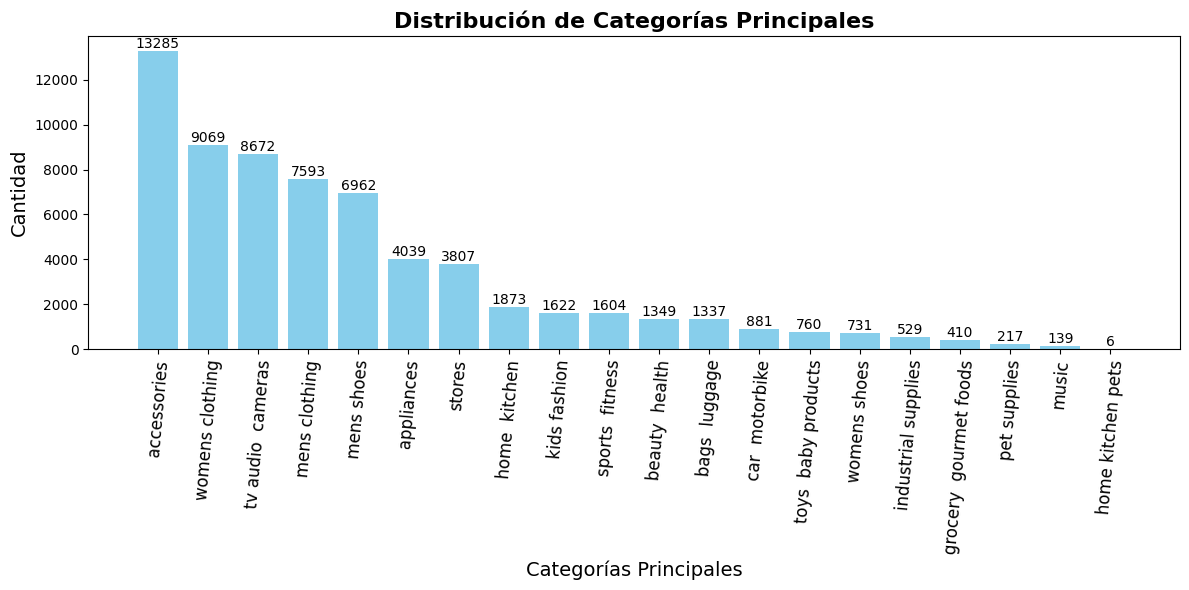

In [ ]:
import matplotlib.pyplot as plt
main_category = df['main_category'].value_counts()
maincat_counts = main_category.values

main_category = df['main_category'].value_counts()

maincat_counts = main_category.values


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
bars = plt.bar(main_category.index, maincat_counts, color='skyblue')

# Añadir título y etiquetas en español
plt.title('Distribución de Categorías Principales', fontsize=16, fontweight='bold')
plt.xlabel('Categorías Principales', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=85, fontsize=12)

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [13]:
# Function to clean and standardize sub_category
def clean_sub_category(category):
    category = category.lower().strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    category = category.replace("'", "")
    category = category.replace('-','')
    return category.title()
df['sub_category'] = df['sub_category'].apply(clean_sub_category)

In [ ]:
df['sub_category'].unique()

array(['Speakers', 'Handbags And Clutches', 'Baby Fashion',
       'Home Entertainment Systems', 'Gold And Diamond Jewellery',
       'Sports Shoes', 'Fashion And Silver Jewellery', 'Innerwear',
       'Kids Fashion', 'Tshirts And Polos', 'Car Parts', 'Womens Fashion',
       'Watches', 'Ethnic Wear', 'Shirts', 'Jeans', 'Televisions',
       'Bags And Luggage', 'Mens Fashion', 'Kids Watches', 'Western Wear',
       'Jewellery', 'Security Cameras', 'Clothing',
       'Kitchen And Home Appliances', 'Wallets', 'Home Furnishing',
       'Lingerie And Nightwear', 'Heating And Cooling Appliances',
       'Sewing And Craft Supplies', 'Car Accessories', 'Sportswear',
       'Lab And Scientific', 'Badminton', 'Snack Foods', 'School Bags',
       'Backpacks', 'Travel Accessories', 'Camera Accessories',
       'Refrigerators', 'Casual Shoes', 'All Electronics', 'Cricket',
       'Formal Shoes', 'Kids Clothing', 'Football', 'All Appliances',
       'Garden And Outdoors', 'Furniture', 'Rucksacks',


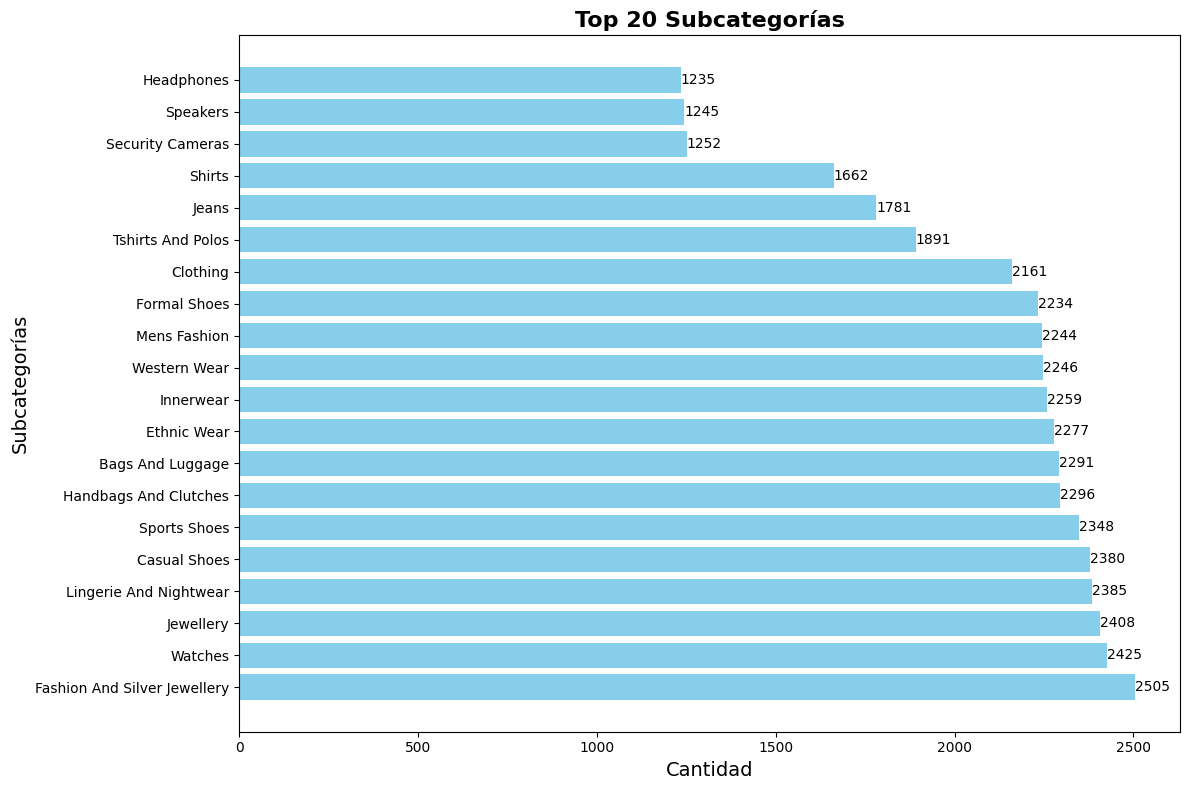

In [ ]:
# Contar las subcategorías y obtener las 20 más frecuentes
subcat_counts = df['sub_category'].value_counts()
top_20_subcats = subcat_counts.nlargest(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
bars = plt.barh(top_20_subcats.index, top_20_subcats, color='skyBlue')

# Añadir título y etiquetas en español
plt.title('Top 20 Subcategorías', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Subcategorías', fontsize=14)

# Añadir etiquetas con los valores en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}',
             ha='left', va='center', fontsize=10)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
df['ratings'].unique()

array(['5.0', '4.2', '3.8', '4.5', nan, '2.7', '3.7', '4.0', '4.6', '3.0',
       '3.6', '3.9', '3.5', '4.4', '2.9', '3.3', '3.2', '2.6', '4.1',
       '3.4', '3.1', '4.3', '2.8', '2.0', '4.7', '1.0', 'FREE', '4.8',
       '2.3', 'Get', '2.5', '2.4', '4.9', '1.5', '1.4', '2.1', '1.3',
       '1.9', '2.2', '1.8', '1.6', '1.7', '₹99', '₹70', '1.2'],
      dtype=object)

In [14]:
def clean_ratings(df, column_name="ratings"):

    # Valores no numéricos que deben convertirse en 0.0
    invalid_values = ['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99']

    # Reemplazar valores no numéricos con 0.0
    df[column_name] = df[column_name].replace(invalid_values, 0.0)

    # Convertir la columna a tipo float, manejando errores silenciosamente
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Formatear para mantener 1 decimal (ej. 4.2 en vez de 4.200000)
    df[column_name] = df[column_name].apply(lambda x: f"{int(x)}.{int((x - int(x)) * 10)}" if pd.notnull(x) else "0.0")

    return df[column_name]

df['ratings'] = clean_ratings(df)

# Ver resultados
print(df['ratings'].unique())  # Valores únicos después de la limpieza
print(df['ratings'].isnull().sum())  # Contar valores nulos


['5.0' '4.2' '3.7' '4.5' '0.0' '2.7' '4.0' '3.0' '3.6' '3.9' '3.5' '4.4'
 '2.9' '3.2' '2.6' '3.3' '3.1' '2.0' '4.7' '1.0' '2.2' '2.5' '2.3' '4.9'
 '1.5' '1.3' '2.1' '1.9' '1.8' '1.6' '1.7' '1.1']
0


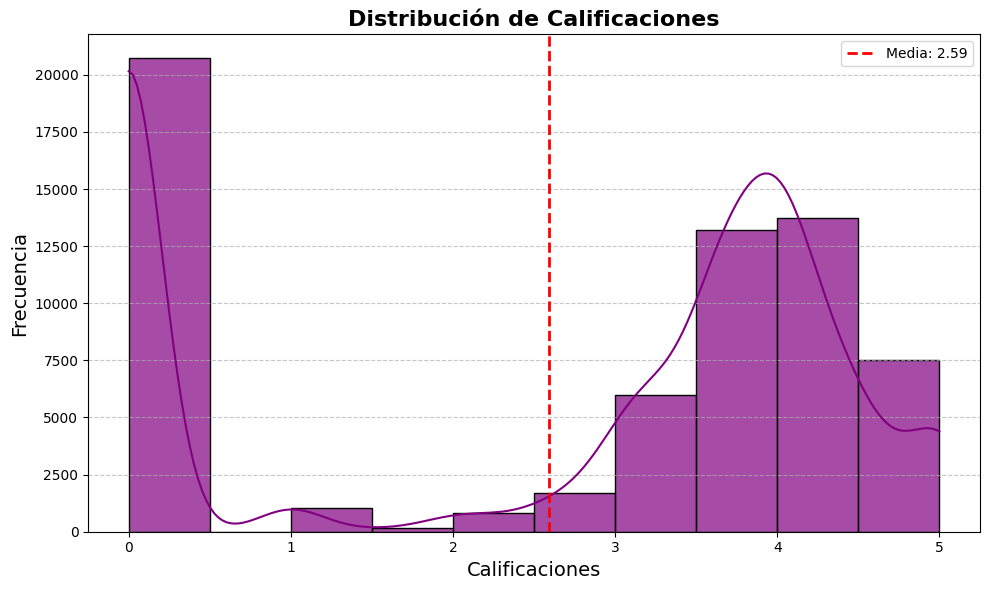

In [ ]:
import seaborn as sns

# Convertir las calificaciones a numéricas
df['ratings'] = pd.to_numeric(df['ratings'])

# Crear el gráfico de distribución
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color='purple', alpha=0.7, edgecolor='black')

# Añadir título y etiquetas en español
plt.title('Distribución de Calificaciones', fontsize=16, fontweight='bold')
plt.xlabel('Calificaciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una línea vertical para marcar la media
mean_rating = df['ratings'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_rating:.2f}')

# Mostrar la leyenda
plt.legend()

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [15]:
import pandas as pd

def clean_no_of_ratings(df, column_name="no_of_ratings"):
    # Eliminar comas en los números
    df[column_name] = df[column_name].astype(str).str.replace(',', '', regex=False)

    # Convertir a número (maneja errores silenciosamente)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Reemplazar valores nulos con 0
    df[column_name] = df[column_name].fillna(0).astype(int)

    return df[column_name]

# Aplicar la función
df['no_of_ratings'] = clean_no_of_ratings(df)

# Ver resultados
print(df['no_of_ratings'])
print(df['no_of_ratings'].isnull().sum())

440099       1
226861      29
30659      208
257496       8
204340       0
          ... 
369789     105
84641        2
323263       2
228480       0
382747    1465
Name: no_of_ratings, Length: 295729, dtype: int64
0


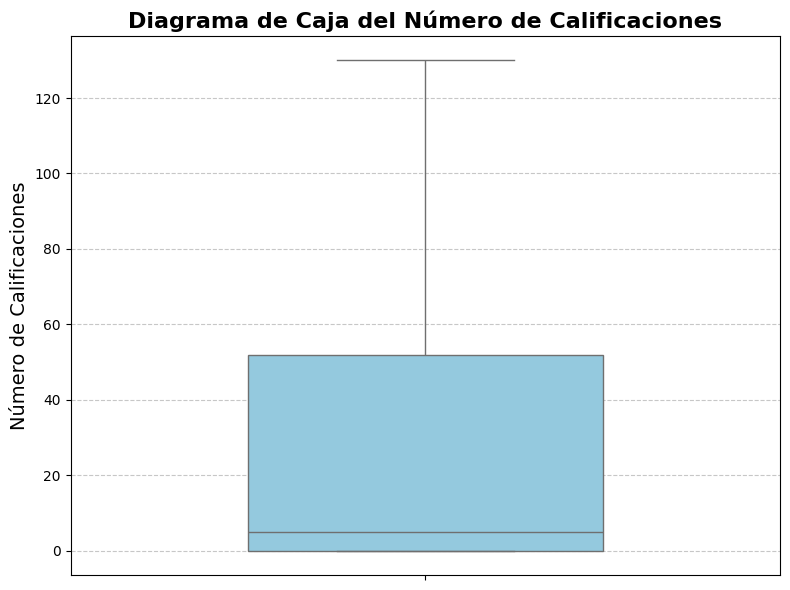

In [ ]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['no_of_ratings'].quantile(0.25)
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Recortar los valores atípicos
df['no_of_ratings'] = df['no_of_ratings'].clip(lower_bound, upper_bound)

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['no_of_ratings'], color='skyblue', width=0.5)

# Añadir título y etiquetas en español
plt.title('Diagrama de Caja del Número de Calificaciones', fontsize=16, fontweight='bold')
plt.ylabel('Número de Calificaciones', fontsize=14)

# Añadir una cuadrícula horizontal para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-29-06b32d6bc2b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', alpha=0.8)


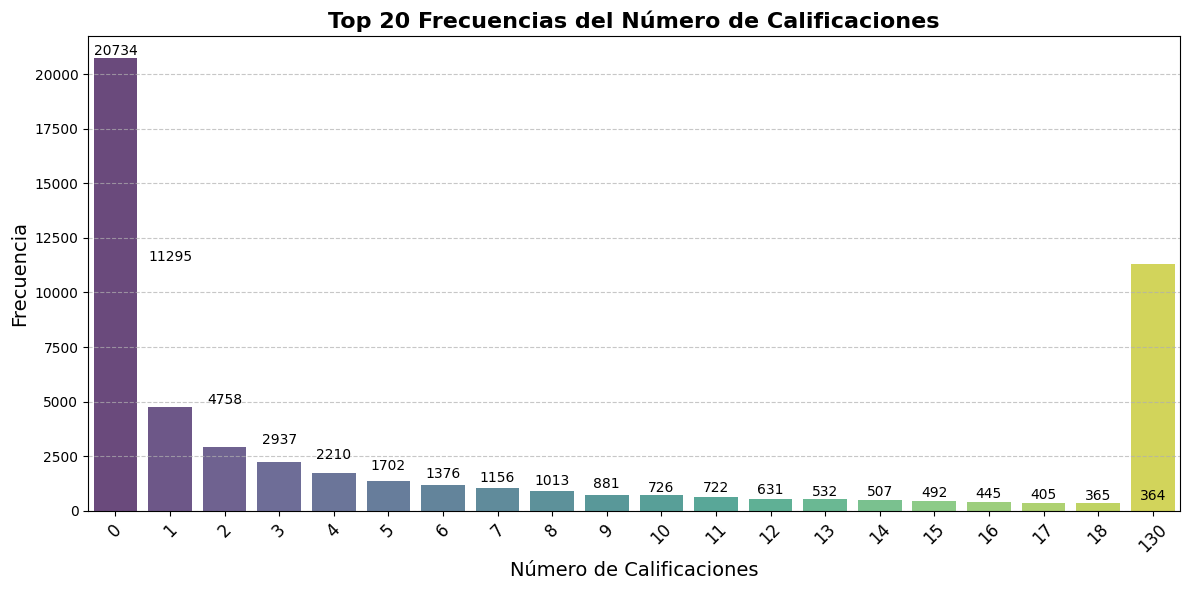

In [ ]:

# Obtener las 20 frecuencias más altas del número de calificaciones
rating_counts = df['no_of_ratings'].value_counts().nlargest(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', alpha=0.8)

# Añadir título y etiquetas en español
plt.title('Top 20 Frecuencias del Número de Calificaciones', fontsize=16, fontweight='bold')
plt.xlabel('Número de Calificaciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)

# Añadir etiquetas con los valores en cada barra
for index, value in enumerate(rating_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=10)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [16]:
def clean_price_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.split(" ", expand=True).get(0)  # Extraer primer fragmento
    df[column_name] = df[column_name].str.replace("₹", "", regex=False)  # Quitar símbolo de rupia
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Convertir a float (maneja errores)
    df[column_name] = df[column_name].fillna(0.0)

    return df[column_name]

df['discount_price'] = clean_price_column(df, 'discount_price')
df['actual_price'] = clean_price_column(df, 'actual_price')

# Ver resultados
print(df)


                                                     name      main_category  \
440099  artis bt15 bluetooth portable speaker mobile h...  tv audio  cameras   
226861  kleio womens girl pu leather multipurpose zip ...        accessories   
30659   freshfoot cute colourful new born baby sock se...       kids fashion   
257496  trinetra 20w usbc adapter charger 3d cute cart...  tv audio  cameras   
204340   pc jeweller 18k 750 rose gold diamond ring woman        accessories   
...                                                   ...                ...   
369789  evolove womens cotton knit pyjama set top tshi...    womens clothing   
84641   petrox 15 led fog light high bright original d...     car  motorbike   
323263  rdgadgets rudraksha shiv trishul damroo adjust...        accessories   
228480  natali trader gift girl woman small pocket wal...        accessories   
382747                  peppyzone men slim fit track pant             stores   

                      sub_category  \
4

In [ ]:
df.isnull().sum()

,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,0
no_of_ratings,0
discount_price,0
actual_price,0


In [17]:
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '', regex=True)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
from sklearn.preprocessing import LabelEncoder
# Ejemplo de limpieza de precios si contienen símbolos (como "₹" y comas)
df['discount_price'] = df['discount_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Encoder para el nombre del producto
name_enc = LabelEncoder()
df['name_encoded'] = name_enc.fit_transform(df['name'])

# Encoder para main_category
main_category_enc = LabelEncoder()
df['main_category_encoded'] = main_category_enc.fit_transform(df['main_category'])

# Encoder para sub_category
sub_category_enc = LabelEncoder()
df['sub_category_encoded'] = sub_category_enc.fit_transform(df['sub_category'])

# Convertir ratings y no_of_ratings a float (si es que hay NaN, considerar imputarlos o eliminarlos)
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(float)

# Normalización de valores entre 0 y 1
df['discount_price'] = df['discount_price'] / df['discount_price'].max()
df['actual_price'] = df['actual_price'] / df['actual_price'].max()
df['ratings'] = df['ratings'] / 5.0  # Suponiendo que el rating máximo es 5
df['no_of_ratings'] = df['no_of_ratings'] / df['no_of_ratings'].max()

df.drop(columns=['link','image'],inplace=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

class RatingPredictor:
    def __init__(self, data, embedding_dims=None):
        self.df = data
        self.embedding_dims = embedding_dims or {
            'product': 50,
            'category': 10
        }

        # Preparar datos
        self._prepare_data()
        self._build_model()

    def _prepare_data(self):
        """Divide y prepara los conjuntos de datos"""
        self.train_set, self.test_set = train_test_split(
            self.df,
            test_size=0.2,
            random_state=42
        )

        # Mapeos de cardinalidad
        self.cardinalities = {
            'product': self.df['name_encoded'].nunique(),
            'main_category': self.df['main_category_encoded'].nunique(),
            'sub_category': self.df['sub_category_encoded'].nunique()
        }

    def _create_embedding_branch(self, input_name, cardinality):
        """Crea una rama de embedding para características categóricas"""
        inp = Input(shape=(1,), name=f"{input_name}_in")
        embed = Embedding(
            input_dim=cardinality,
            output_dim=self.embedding_dims['category' if 'category' in input_name else 'product'],
            name=f"{input_name}_embed"
        )(inp)
        return inp, Flatten()(embed)

    def _build_model(self):
        """Construye la arquitectura del modelo"""
        # Entradas categóricas
        product_in, product_vec = self._create_embedding_branch('product', self.cardinalities['product'])
        main_cat_in, main_cat_vec = self._create_embedding_branch('main_category', self.cardinalities['main_category'])
        sub_cat_in, sub_cat_vec = self._create_embedding_branch('sub_category', self.cardinalities['sub_category'])

        # Entradas numéricas
        numeric_in = Input(shape=(3,), name="numeric_features")

        # Fusión de características
        merged = Concatenate()([
            product_vec,
            main_cat_vec,
            sub_cat_vec,
            numeric_in
        ])

        # Capas de procesamiento
        x = Dense(64, activation='relu')(merged)  # Antes: 128
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)  # Antes: 64
        x = Dropout(0.2)(x)
        output = Dense(1, activation='linear')(x)

        # Ensamblar modelo
        self.model = Model(
            inputs=[product_in, main_cat_in, sub_cat_in, numeric_in],
            outputs=output
        )

        self.model.compile(
            optimizer=Adam(),
            loss='mse',
            metrics=['mae', 'mse']
        )

    def train(self, epochs=25, batch_size=32):
        """Entrena el modelo"""
        # Extraer características de entrenamiento
        features = {
            'product': self.train_set['name_encoded'].values,
            'main_category': self.train_set['main_category_encoded'].values,
            'sub_category': self.train_set['sub_category_encoded'].values,
            'numeric': self.train_set[['discount_price', 'actual_price', 'no_of_ratings']].values
        }

        targets = self.train_set['ratings'].values

        return self.model.fit(
            x=[features[k] for k in ['product', 'main_category', 'sub_category', 'numeric']],
            y=targets,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.1,
            verbose=1
        )

    def summary(self):
        """Muestra resumen del modelo"""
        return self.model.summary()

# Uso del modelo
if __name__ == "__main__":
    # Cargar datos aquí (df = ...)

    # Instanciar predictor
    predictor = RatingPredictor(df)

    # Ver arquitectura
    predictor.summary()

    # Entrenar modelo
    training_history = predictor.train(epochs=25, batch_size=32)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ product_in (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ main_category_in          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_category_in           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ product_embed (Embedding) │ (None, 1, 50)          │     14,665,350 │ product_in[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ main_category_embed       │ (None, 1, 10)          │            200 │ main_category_in[0][0] │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_category_embed        │ (None, 1, 10)          │          1,120 │ sub_category_in[0][0]  │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 50)             │              0 │ product_embed[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 10)             │              0 │ main_category_embed[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 10)             │              0 │ sub_category_embed[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numeric_features          │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 73)             │              0 │ flatten_3[0][0],       │
│ (Concatenate)             │                        │                │ flatten_4[0][0],       │
│                           │                        │                │ flatten_5[0][0],       │
│                           │                        │                │ numeric_features[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          4,736 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)      

 Total params: 14,673,519 (55.98 MB)

 Trainable params: 14,673,519 (55.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
 778/6654 ━━━━━━━━━━━━━━━━━━━━ 30:44 314ms/step - loss: 0.1560 - mae: 0.3396 - mse: 0.1560

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re
import pickle
import os

class ContentBasedRecommender:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.product_embeddings = None
        self.products_df = None
        self.id_to_index_map = {}  # New: mapping between product_ids and DataFrame indices

    def preprocess_text(self, text):
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'[^\w\s]', ' ', text)
            return text
        return ''

    def create_product_description(self, row):
        return f"{row['name']} {row['main_category']} {row['sub_category']}"

    def fit(self, products_data):
        # Create a copy of the input data
        self.products_df = products_data.copy()

        # Ensure product_id exists
        if 'product_id' not in self.products_df.columns:
            self.products_df['product_id'] = range(len(self.products_df))

        # Create the ID to index mapping
        self.id_to_index_map = dict(zip(self.products_df['product_id'], self.products_df.index))

        # Create combined features
        self.products_df['combined_features'] = self.products_df.apply(
            lambda x: self.preprocess_text(self.create_product_description(x)), axis=1
        )

        # Generate embeddings
        self.product_embeddings = self.model.encode(
            self.products_df['combined_features'].tolist(),
            show_progress_bar=True
        )
        return self

    def get_recommendations(self, product_id, n_recommendations=5):
        if self.products_df is None or self.product_embeddings is None:
            raise ValueError("El modelo no ha sido entrenado o cargado correctamente")

        if product_id not in self.id_to_index_map:
            raise ValueError(f"ID de producto {product_id} no encontrado en la base de datos")

        # Get the correct index using the mapping
        product_idx = self.id_to_index_map[product_id]

        similarity_scores = cosine_similarity(
            [self.product_embeddings[product_idx]],
            self.product_embeddings
        )[0]

        similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]
        recommendations = self.products_df.iloc[similar_indices][
            ['product_id', 'name', 'main_category', 'sub_category', 'ratings']
        ].copy()
        recommendations['similarity_score'] = similarity_scores[similar_indices]
        return recommendations

    def recommend_from_text(self, query_text, n_recommendations=5):
        processed_query = self.preprocess_text(query_text)
        query_embedding = self.model.encode([processed_query])[0]

        similarity_scores = cosine_similarity(
            [query_embedding],
            self.product_embeddings
        )[0]

        similar_indices = similarity_scores.argsort()[::-1][:n_recommendations]
        recommendations = self.products_df.iloc[similar_indices][
            ['product_id', 'name', 'main_category', 'sub_category', 'ratings']
        ].copy()
        recommendations['similarity_score'] = similarity_scores[similar_indices]
        return recommendations

    def save_model(self, folder_path="modelo_recomendador"):
        os.makedirs(folder_path, exist_ok=True)

        # Save all necessary components
        self.products_df.to_pickle(os.path.join(folder_path, "products.pkl"))
        with open(os.path.join(folder_path, "embeddings.pkl"), 'wb') as f:
            pickle.dump(self.product_embeddings, f)
        with open(os.path.join(folder_path, "id_mapping.pkl"), 'wb') as f:
            pickle.dump(self.id_to_index_map, f)

        print(f"Modelo guardado en: {folder_path}")

    @classmethod
    def load_model(cls, folder_path="modelo_recomendador"):
        try:
            if not os.path.exists(folder_path):
                raise FileNotFoundError(f"No se encontró la carpeta: {folder_path}")

            products_path = os.path.join(folder_path, "products.pkl")
            embeddings_path = os.path.join(folder_path, "embeddings.pkl")
            mapping_path = os.path.join(folder_path, "id_mapping.pkl")

            if not all(os.path.exists(p) for p in [products_path, embeddings_path, mapping_path]):
                raise FileNotFoundError("No se encontraron los archivos necesarios del modelo")

            instance = cls()
            instance.products_df = pd.read_pickle(products_path)

            with open(embeddings_path, 'rb') as f:
                instance.product_embeddings = pickle.load(f)

            with open(mapping_path, 'rb') as f:
                instance.id_to_index_map = pickle.load(f)

            print("Modelo cargado exitosamente")
            return instance

        except Exception as e:
            print(f"Error al cargar el modelo: {str(e)}")
            return None

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
recommender = ContentBasedRecommender()  # Usar tus datos reales aquí
recommender.fit(df)

Batches:   0%|          | 0/2028 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import os

class TrainingMetrics:
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.train_aucs = []
        self.val_aucs = []
        self.train_precisions = []
        self.val_precisions = []
        self.train_recalls = []
        self.val_recalls = []
        self.train_f1s = []
        self.val_f1s = []

    def update(self, split, loss, y_true, y_pred):
        metrics_dict = getattr(self, f"{split}_metrics")
        y_pred_binary = (y_pred > 0.5).float()

        metrics_dict['losses'].append(loss)
        metrics_dict['aucs'].append(roc_auc_score(y_true.cpu(), y_pred.cpu()))
        metrics_dict['precisions'].append(precision_score(y_true.cpu(), y_pred_binary.cpu()))
        metrics_dict['recalls'].append(recall_score(y_true.cpu(), y_pred_binary.cpu()))
        metrics_dict['f1s'].append(f1_score(y_true.cpu(), y_pred_binary.cpu()))

    def plot_metrics(self, save_path=None):
        metrics = ['loss', 'auc', 'precision', 'recall', 'f1']
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()

        for idx, metric in enumerate(metrics):
            ax = axes[idx]
            train_values = getattr(self, f'train_{metric}s')
            val_values = getattr(self, f'val_{metric}s')

            ax.plot(train_values, label=f'Train {metric}')
            ax.plot(val_values, label=f'Val {metric}')
            ax.set_title(f'{metric.upper()} over epochs')
            ax.legend()
            ax.grid(True)

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import pickle
import os

class ProductDataset(Dataset):
    def __init__(self, embeddings, positive_pairs, negative_pairs):
        self.embeddings = embeddings
        self.positive_pairs = positive_pairs
        self.negative_pairs = negative_pairs

    def __len__(self):
        return len(self.positive_pairs) + len(self.negative_pairs)

    def __getitem__(self, idx):
        if idx < len(self.positive_pairs):
            # Positive pair
            i, j = self.positive_pairs[idx]
            label = 1.0
        else:
            # Negative pair
            idx = idx - len(self.positive_pairs)
            i, j = self.negative_pairs[idx]
            label = 0.0

        emb1 = torch.tensor(self.embeddings[i], dtype=torch.float32)
        emb2 = torch.tensor(self.embeddings[j], dtype=torch.float32)
        return emb1, emb2, torch.tensor(label, dtype=torch.float32)

class NeuralRecommender(nn.Module):
    def __init__(self, embedding_dim, hidden_dim=128):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(embedding_dim * 2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, emb1, emb2):
        # Concatenar los embeddings
        combined = torch.cat([emb1, emb2], dim=1)
        return self.network(combined)

class NeuralRecommenderSystem:
    def __init__(self, embedding_dim=384, hidden_dim=128):
        self.metrics = TrainingMetrics()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.model = None
        self.text_encoder = SentenceTransformer('all-MiniLM-L6-v2')
        self.product_embeddings = None
        self.products_df = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def preprocess_text(self, text):
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'[^\w\s]', ' ', text)
            return text
        return ''

    def create_product_description(self, row):
        return f"{row['name']} {row['main_category']} {row['sub_category']}"

    def generate_training_pairs(self, n_positive=10000, n_negative=10000):
        n_products = len(self.products_df)

        # Generar pares positivos (productos de la misma categoría)
        positive_pairs = []
        categories = self.products_df.groupby('main_category').groups

        for category_products in categories.values():
            if len(category_products) > 1:
                category_products = list(category_products)
                pairs = [(i, j)
                        for i in category_products
                        for j in category_products
                        if i < j]
                positive_pairs.extend(pairs)

        if len(positive_pairs) > n_positive:
            positive_pairs = np.random.choice(positive_pairs, n_positive, replace=False)

        # Generar pares negativos (productos de diferentes categorías)
        negative_pairs = []
        categories_list = list(categories.keys())

        for _ in range(n_negative):
            cat1, cat2 = np.random.choice(categories_list, 2, replace=False)
            prod1 = np.random.choice(list(categories[cat1]))
            prod2 = np.random.choice(list(categories[cat2]))
            negative_pairs.append((prod1, prod2))

        return positive_pairs, negative_pairs

    def generate_embeddings(self):
        """Genera embeddings a partir de los datos actuales"""
        descriptions = self.products_df.apply(
            lambda x: self.preprocess_text(self.create_product_description(x)), axis=1
        ).tolist()

        return self.text_encoder.encode(descriptions)

    def evaluate_epoch(self, dataloader, split='train'):
        self.model.eval()
        total_loss = 0
        all_labels = []
        all_predictions = []
        criterion = nn.BCELoss()

        with torch.no_grad():
            for emb1, emb2, labels in dataloader:
                emb1, emb2, labels = emb1.to(self.device), emb2.to(self.device), labels.to(self.device)
                outputs = self.model(emb1, emb2).squeeze()
                loss = criterion(outputs, labels)

                total_loss += loss.item()
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(outputs.cpu().numpy())

        avg_loss = total_loss / len(dataloader)
        all_labels = torch.tensor(all_labels)
        all_predictions = torch.tensor(all_predictions)

        self.metrics.update(split, avg_loss, all_labels, all_predictions)
        return avg_loss

    def fit(self, products_data, epochs=10, batch_size=64, learning_rate=0.001, validation_split=0.2):
        # Preparar datos
        self.products_df = products_data.copy().reset_index(drop=True)
        product_embeddings = self.generate_embeddings()

        # Generar pares de entrenamiento
        positive_pairs, negative_pairs = self.generate_training_pairs()

        # Crear dataset completo
        dataset = ProductDataset(product_embeddings, positive_pairs, negative_pairs)

        # Dividir en train y validation
        train_size = int((1 - validation_split) * len(dataset))
        val_size = len(dataset) - train_size
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Inicializar modelo
        self.model = NeuralRecommender(self.embedding_dim, self.hidden_dim).to(self.device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

        # Entrenamiento con métricas
        best_val_loss = float('inf')
        best_model_state = None

        for epoch in range(epochs):
            # Training
            self.model.train()
            total_train_loss = 0
            all_train_labels = []
            all_train_predictions = []

            for emb1, emb2, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
                emb1, emb2, labels = emb1.to(self.device), emb2.to(self.device), labels.to(self.device)

                optimizer.zero_grad()
                outputs = self.model(emb1, emb2).squeeze()
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

                total_train_loss += loss.item()
                all_train_labels.extend(labels.cpu().numpy())
                all_train_predictions.extend(outputs.detach().cpu().numpy())

            # Calcular métricas de training
            avg_train_loss = total_train_loss / len(train_loader)
            train_labels = torch.tensor(all_train_labels)
            train_predictions = torch.tensor(all_train_predictions)
            self.metrics.update('train', avg_train_loss, train_labels, train_predictions)

            # Validation
            val_loss = self.evaluate_epoch(val_loader, 'val')

            # Guardar mejor modelo
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = self.model.state_dict().copy()

            print(f'Epoch {epoch+1}/{epochs}:')
            print(f'Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}')
            print(f'Train AUC: {self.metrics.train_aucs[-1]:.4f}, Val AUC: {self.metrics.val_aucs[-1]:.4f}')
            print(f'Train F1: {self.metrics.train_f1s[-1]:.4f}, Val F1: {self.metrics.val_f1s[-1]:.4f}')

        # Restaurar mejor modelo
        self.model.load_state_dict(best_model_state)
        return self.metrics

    def save_model(self, folder_path="modelo_recomendador_neural"):
        os.makedirs(folder_path, exist_ok=True)

        # Guardar modelo y datos
        torch.save(self.model.state_dict(), os.path.join(folder_path, "model.pth"))
        self.products_df.to_csv(os.path.join(folder_path, "products.csv"), index=False)

        # Guardar gráficas de métricas
        self.metrics.plot_metrics(save_path=os.path.join(folder_path, "training_metrics.png"))

        print(f"Modelo y métricas guardadas en: {folder_path}")

In [ ]:
# Crear y entrenar el recomendador
recommender = NeuralRecommenderSystem()
recommender.fit(df, epochs=10)

In [ ]:


# Obtener recomendaciones
recommendations = recommender.get_recommendations(product_id=4, n_recommendations=5)

In [ ]:
# Por ID
recomendaciones = recommender.get_recommendations(product_id=1, n_recommendations=5)
print("Recomendaciones por ID:")
print(recomendaciones)

# Por texto
recomendaciones = recommender.recommend_from_text("zapatos para correr", n_recommendations=5)
print("\nRecomendaciones por texto:")
print(recomendaciones)

Recomendaciones por ID:
     product_id                                               name  \
22           22  lg 15 ton 4 star ai dual inverter split ac cop...   
3             3  lg 15 ton 3 star ai dual inverter split ac cop...   
274         270  lg 1 ton 5 star ai dual inverter split ac copp...   
173         171  lg 15 ton 4 star dual inverter split ac copper...   
101         101  lg 15 ton 3 star dual inverter split ac copper...   

    main_category      sub_category ratings  similarity_score  
22     appliances  Air Conditioners     4.0          0.995662  
3      appliances  Air Conditioners     4.0          0.995002  
274    appliances  Air Conditioners     4.2          0.975157  
173    appliances  Air Conditioners     4.2          0.973650  
101    appliances  Air Conditioners     4.0          0.972917  

Recomendaciones por texto:
        product_id                                               name  \
109723       91859         gosriki womens rayon kurta pant zonmypinks 

In [ ]:
recommender.save_model()

Modelo guardado en: modelo_recomendador


In [ ]:
recommender = ContentBasedRecommender.load_model(folder_path="modelo_recomendador")

Modelo cargado exitosamente


In [ ]:
# Por ID
recomendaciones = recommender.get_recommendations(product_id=200, n_recommendations=5)
print("Recomendaciones por ID:")
print(recomendaciones)

# Por texto
recomendaciones = recommender.recommend_from_text("Running shoes", n_recommendations=5)
print("\nRecomendaciones por texto:")
print(recomendaciones)

Recomendaciones por ID:
     product_id                                               name  \
379         379  carrier 15 ton 3 star inverter split ac durafr...   
682         682  carrier 18k octra split ac 15 ton 3 star ratin...   
372         372  carrier durawhite pro cx 15 ton 3 star split a...   
425         425  carrier split ac 2 ton 3 star inverterwhite 24...   
438         438  carrier 2 ton 3 star split ac white24k emperia...   

    main_category      sub_category  ratings  similarity_score  
379    appliances  Air Conditioners      4.0          0.868962  
682    appliances  Air Conditioners      0.0          0.868251  
372    appliances  Air Conditioners      0.0          0.856881  
425    appliances  Air Conditioners      3.9          0.847612  
438    appliances  Air Conditioners      0.0          0.844589  

Recomendaciones por texto:
        product_id                                         name main_category  \
337094      337094                            running sh

In [ ]:

# Función para cargar el modelo
def load_recommender_model(folder_path="model_Recomender"):
    return ContentBasedRecommender.load_model(folder_path)

# Función para recomendar productos basados en un ID
def recommend_by_product_id(model, product_id, n_recommendations=5):
    if model is None:
        raise ValueError("El modelo no está cargado correctamente.")
    return model.get_recommendations(product_id, n_recommendations)

# Función para recomendar productos basados en texto
def recommend_by_text(model, query_text, n_recommendations=5):
    if model is None:
        raise ValueError("El modelo no está cargado correctamente.")
    return model.recommend_from_text(query_text, n_recommendations)


In [ ]:
if __name__ == "__main__":
    model = load_recommender_model()
    if model:
        print(recommend_by_product_id(model, 1, 5))
        print(recommend_by_text(model, "laptop gaming", 5))


NameError: name 'load_recommender_model' is not defined

In [ ]:

# Por texto
recomendaciones = recommender.recommend_from_text("Running shoes", n_recommendations=5)
print("\nRecomendaciones por texto:")
print(recomendaciones)


Recomendaciones por texto:
        product_id                                               name  \
463743       59416                                       running shoe   
463398       58152                                   running shoe men   
451977       53955                           unistar men running shoe   
452123        1990                          shoecart men running shoe   
464018       13759  running shoe men running shoe running shoe run...   

       main_category  sub_category  ratings  similarity_score  
463743    mens shoes  Sports Shoes      0.0          0.825108  
463398    mens shoes  Sports Shoes      0.0          0.783558  
451977    mens shoes  Sports Shoes      3.7          0.782324  
452123    mens shoes  Sports Shoes      5.0          0.779732  
464018    mens shoes  Sports Shoes      0.0          0.773657  


In [ ]:
#guardamos el df
recommender.products_df.to_csv('products_df.csv', index=False)

In [ ]:
# Por ID
recomendaciones = recommender.get_recommendations(product_id=4, n_recommendations=5)
print("Recomendaciones por ID:")
print(recomendaciones)

# Por texto
recomendaciones = recommender.recommend_from_text("zapatos para correr", n_recommendations=5)
print("\nRecomendaciones por texto:")
print(recomendaciones)

IndexError: El índice 204340 está fuera de rango para embeddings de tamaño 64885

In [ ]:
print(f"Total productos en DataFrame: {len(recommender.products_df)}")
print(f"Tamaño de la matriz de embeddings: {len(recommender.product_embeddings)}")


Total productos en DataFrame: 64885
Tamaño de la matriz de embeddings: 64885
